<a href="https://colab.research.google.com/github/yisiszhang/AdvancedPython/blob/main/colab/Lecture4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lecture 4: Unsupervised learning**

# PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt

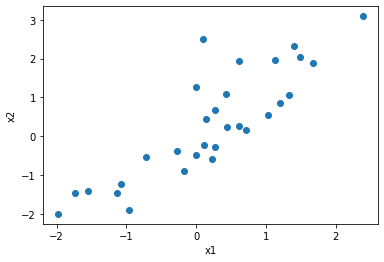

In [2]:
np.random.seed(10)
n = 30
# create a random array as x1~N(0,1)
x1 = np.random.normal(0,1,n)
# get Y using matrix multiplication
beta = 1.0
# x2 = beta*x1+noise, suppose noise ~ Norm(0,1)
x2 = beta * x1 + np.random.normal(0,1,n)

plt.scatter(x1, x2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [3]:
# find principle components
X = np.vstack((x1,x2)).T
# center the data
Xmean = np.mean(X,axis=0)
Xc = X - Xmean
# conduct singular value decomposition
u, s, vh = np.linalg.svd(Xc, full_matrices=False)
u.shape, s.shape, vh.shape

((30, 2), (2,), (2, 2))

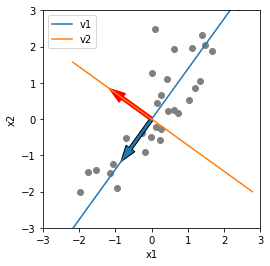

[[-0.58506728 -0.81098476]
 [-0.81098476  0.58506728]]


In [11]:
x_plot = np.linspace(np.min(Xc[:,0]), np.max(Xc[:,1]), 10)
v_plot = vh[:,1]/vh[:,0] 
v_plot = np.vstack((x_plot,x_plot)) *v_plot[:,np.newaxis]

fig = plt.figure()
ax = fig.add_subplot(111)

plt.scatter(x1, x2, c='gray')
plt.plot(x_plot, v_plot.T)
plt.xlabel('x1')
plt.ylabel('x2')
plt.arrow(0,0,vh[0,0],vh[0,1],width=0.1)
plt.arrow(0,0,vh[1,0],vh[1,1],width=0.1,color='red')
plt.xlim((-3, 3))
plt.ylim((-3, 3))
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.legend(['v1','v2'])
plt.show()

print(vh)

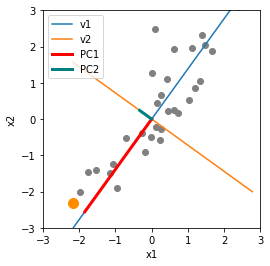

In [19]:
# plot the ith x
i = 20
xi = Xc[i,:]
uidi = u[i,:]*s
uidi_v = uidi * vh.T

fig = plt.figure()
ax = fig.add_subplot(111)

plt.scatter(x1, x2, c='gray')
plt.scatter(xi[0],xi[1],s=100,c='darkorange')
plt.plot(x_plot, v_plot.T)
plt.plot(np.array([0,uidi_v[0,0]]),np.array([0,uidi_v[1,0]]),linewidth=3,color='red')
plt.plot(np.array([0,uidi_v[0,1]]),np.array([0,uidi_v[1,1]]),linewidth=3,color='teal')

plt.xlabel('x1')
plt.ylabel('x2')

plt.xlim((-3, 3))
plt.ylim((-3, 3))
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.legend(['v1','v2','PC1','PC2'],loc='upper left')
plt.show()

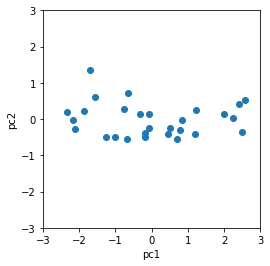

In [6]:
# calculate the first 2 pcs
pc = u*s

fig = plt.figure()
ax = fig.add_subplot(111)

plt.scatter(pc[:,0], pc[:,1])

plt.xlabel('pc1')
plt.ylabel('pc2')
plt.xlim((-3, 3))
plt.ylim((-3, 3))
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.show()

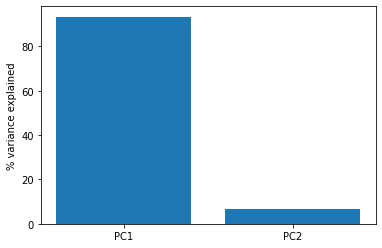

In [7]:
var_explained = s**2/np.sum(s**2)
plt.bar(['PC1','PC2'], var_explained*100)
plt.ylabel('% variance explained')
plt.show()

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.components_)
print(vh)
print(pca.explained_variance_ratio_)
print(var_explained)

[[ 0.58506728  0.81098476]
 [-0.81098476  0.58506728]]
[[-0.58506728 -0.81098476]
 [-0.81098476  0.58506728]]
[0.93422973 0.06577027]
[0.93422973 0.06577027]


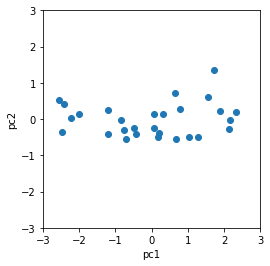

In [15]:
projected = pca.fit_transform(Xc)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(projected[:, 0], projected[:, 1])
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.xlim((-3, 3))
plt.ylim((-3, 3))
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
plt.show()

# K-Means Clustering

In [30]:
import numpy as np

# implement k-means clustering algorithms
def kmeans(x, k, maxiter = 1000):
  n,p = x.shape
  c = np.random.choice(k, n)
  assign_finish = False
  niter = 0
  while (not assign_finish) or niter<maxiter:
    c_last = c
    cent=[np.mean(x[c==i,:], axis=0) for i in range(k)]
    kdist = [np.sum((x-cent[i])**2, axis=1) for i in range(k)]
    kdist = np.stack(kdist,axis=0)
    c = np.argmin(kdist,axis=0)
    assign_finish = not(any(c!=c_last))
    niter = niter + 1
  return c,assign_finish

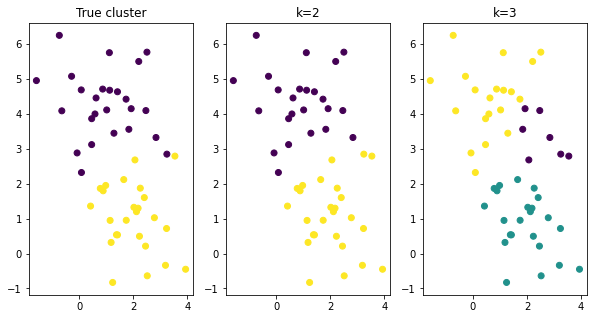

In [32]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
np.random.seed(1)
X, y_true = make_blobs(n_samples=50, centers=2, n_features=2,random_state=0)

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.scatter(X[:,0], X[:,1], c=y_true)
plt.title('True cluster')

plt.subplot(1,3,2)
k = 2
C,af = kmeans(X,k)
plt.scatter(X[:,0], X[:,1], c=C)
plt.title('k=2')

plt.subplot(1,3,3)
k = 3
C,af = kmeans(X,k)
plt.scatter(X[:,0], X[:,1], c=C)
plt.title('k=3')
plt.show()

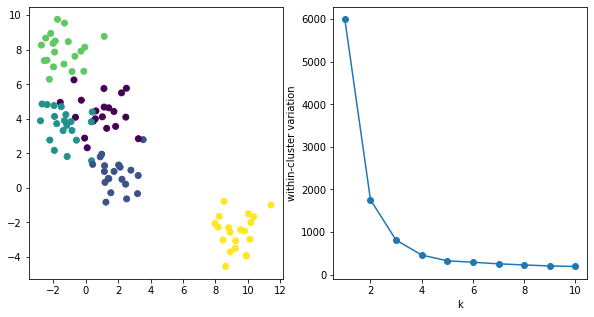

In [37]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(100)
X, y_true = make_blobs(n_samples=100, centers=5, n_features=2,random_state=0)

# define a function to calculate within-cluster variation
def kmeans_WCV(x,kmax):
  wcv = []
  for k in range(1,kmax+1):
    kmeans = KMeans(n_clusters = k).fit(x)
    cent = kmeans.cluster_centers_
    c = kmeans.labels_
    kdist = [2*np.sum((x[c==i,:]-cent[i,:])**2) for i in range(k)]
    wcv.append(np.sum(kdist))
  return wcv

kmax = 10
wcv = kmeans_WCV(X,kmax)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=y_true)

plt.subplot(1,2,2)
plt.plot(np.arange(kmax)+1, wcv,'o-')
plt.xlabel('k')
plt.ylabel('within-cluster variation')

plt.show()

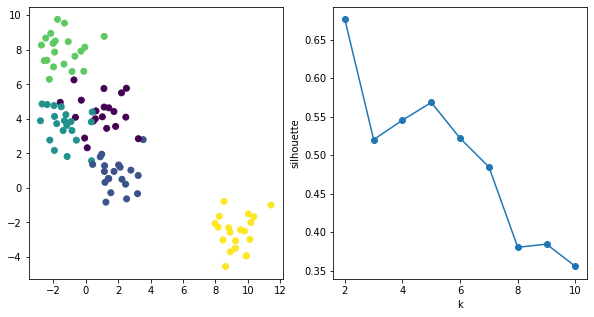

In [44]:
from sklearn.metrics import silhouette_score
sil = []
kmax = 10
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters=k).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric='euclidean'))

plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=y_true)

plt.subplot(1,2,2)
plt.plot(np.arange(2,kmax+1), sil, 'o-')
plt.xlabel('k')
plt.ylabel('silhouette')

plt.rcParams["figure.figsize"] = (10,5)
plt.show()

# Hierarchical clustering

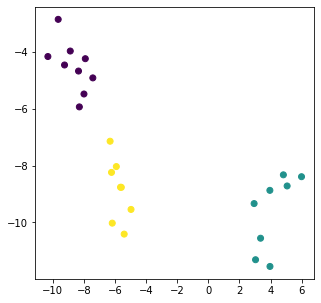

In [50]:
from scipy.cluster import hierarchy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples=25, centers=3, n_features=2,random_state=21)

plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y_true)

plt.show()

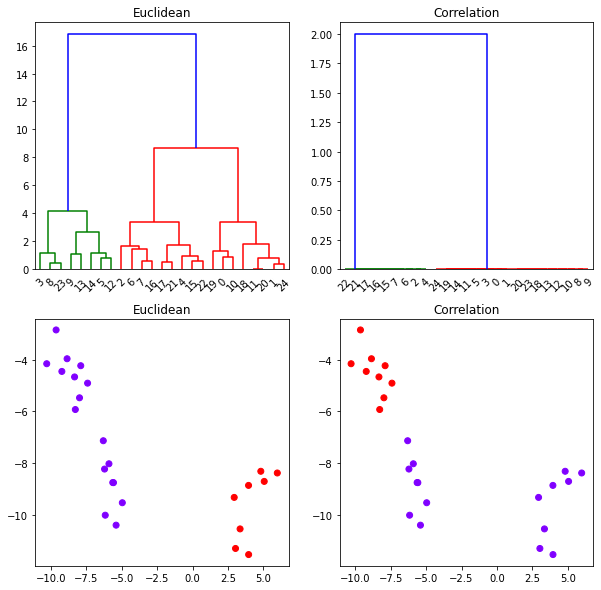

In [53]:
from sklearn.cluster import AgglomerativeClustering
plt.figure(figsize=(10,10))

Z = hierarchy.linkage(X, 'complete')
plt.subplot(2,2,1)
dn1 = hierarchy.dendrogram(Z)
plt.title('Euclidean')

Z = hierarchy.linkage(X, 'complete','correlation')
plt.subplot(2,2,2)
dn2 = hierarchy.dendrogram(Z)
plt.title('Correlation')

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
cluster.fit_predict(X)
plt.subplot(2,2,3)
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')
plt.title('Euclidean')

cluster = AgglomerativeClustering(n_clusters=2, affinity='correlation', linkage='complete')
cluster.fit_predict(X)
plt.subplot(2,2,4)
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')
plt.title('Correlation')

plt.show()

# Homework
1. Make high-dimensional blob data and plot in the PC space the first 2 PCs.
2. Apply clustering to the data.